In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(font_scale=1.1)

from statannot import add_stat_annotation

In [5]:
f = pd.read_csv('CIBERSORT_clsadded.txt',sep='\t')

In [6]:
sum(f['Hier_k3'])

74

In [7]:
f['Hier_k3'] = f['Hier_k3'].replace(1,'Low_risk').replace(0,'High_risk')

In [8]:
f["celltype_index"] = list(np.repeat('B cells naive',173,axis=0))
fm = pd.concat([f['Hier_k3'],f["celltype_index"],f['B cells naive']],axis=1)
fm.columns = ['risk_group','cell_type','abundance']
for celltype in f.columns[1:22]:
    f["celltype_index"] = list(np.repeat(celltype,173,axis=0))
    current = pd.concat([f['Hier_k3'],f["celltype_index"],f[celltype]],axis=1)
    current.columns = ['risk_group','cell_type','abundance']
    fm = pd.concat([fm,current],axis=0)

In [9]:
fm

,risk_group,cell_type,abundance
TCGA-BA-5149-01,High_risk,B cells naive,0.002285
TCGA-BA-5152-01,Low_risk,B cells naive,0.000000
TCGA-BA-5153-01,Low_risk,B cells naive,0.000000
TCGA-BA-5556-01,Low_risk,B cells naive,0.060200
TCGA-BA-5558-01,High_risk,B cells naive,0.012238
...,...,...,...
TCGA-UF-A7JC-01,High_risk,Neutrophils,0.000000
TCGA-UF-A7JD-01,High_risk,Neutrophils,0.003940
TCGA-UF-A7JO-01,High_risk,Neutrophils,0.000000
TCGA-UF-A7JT-01,Low_risk,Neutrophils,0.002038


In [10]:
list(fm['cell_type'].unique())

['B cells naive',
 'B cells memory',
 'Plasma cells',
 'T cells CD8',
 'T cells CD4 naive',
 'T cells CD4 memory resting',
 'T cells CD4 memory activated',
 'T cells follicular helper',
 'T cells regulatory (Tregs)',
 'T cells gamma delta',
 'NK cells resting',
 'NK cells activated',
 'Monocytes',
 'Macrophages M0',
 'Macrophages M1',
 'Macrophages M2',
 'Dendritic cells resting',
 'Dendritic cells activated',
 'Mast cells resting',
 'Mast cells activated',
 'Eosinophils',
 'Neutrophils']

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low_risk v.s. High_risk: Mann-Whitney-Wilcoxon test two-sided P_val=1.414e-02 U_stat=4.459e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low_risk v.s. High_risk: Mann-Whitney-Wilcoxon test two-sided P_val=2.630e-03 U_stat=4.366e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low_risk v.s. High_risk: Mann-Whitney-Wilcoxon test two-sided P_val=5.727e-01 U_stat=3.480e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low_risk v.s. High_risk: Mann-Whitney-Wilcoxon test two-sid

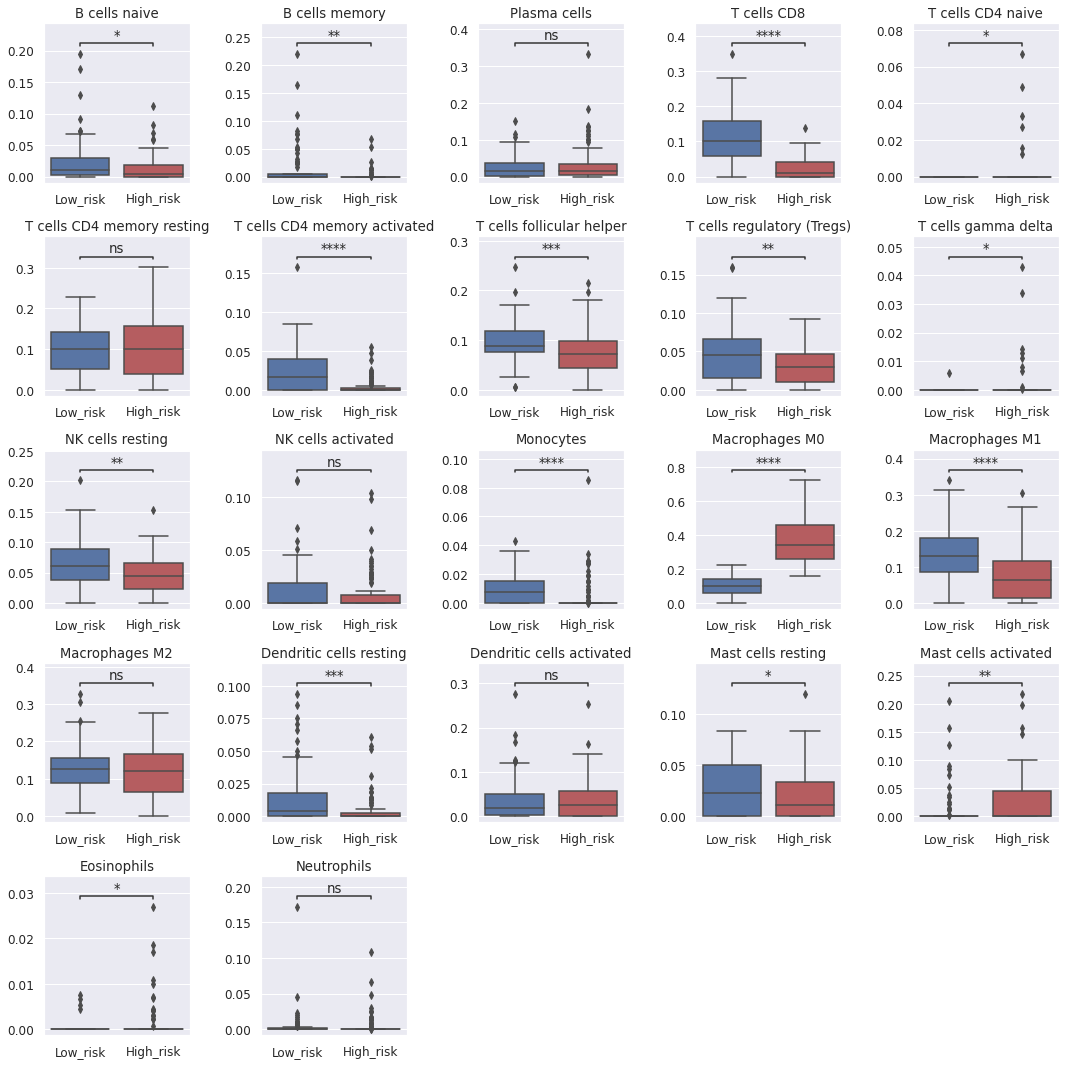

In [16]:
table = fm
table.columns = ['name', 'type', 'value']

a = []
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
a7 = []
a8 = []
a9 = []
a10 = []
a11 = []
a12 = []
a13 = []
a14 = []
a15 = []
a16 = []
a17 = []
a18 = []
a19 = []
a20 = []
a21 = []
a22 = []
    
gene = [a,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22]
name = list(fm['type'].unique())

for i in range(0, len(gene)):
    table2 = table[table['type'] == name[i]]
    dia = table2['name'] == ('Low_risk')
    rel = table2['name'] == ('High_risk')
    gene[i] = table2[dia].append(table2[rel])
    
fig = plt.figure(figsize=(15,15))
for i in range(0,len(gene)):    
    fig.add_subplot(5, 5, i+1)

    f1 = sns.boxplot(data=gene[i], x = gene[i]['name'], y = gene[i]['value'], palette=['B','R'])

    plt.xticklabels = ''
    plt.xlabel('')
    plt.ylabel('')
    f1.set_title('%s' %name[i])
    
    
    add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                box_pairs=[(("Low_risk"), ("High_risk"))
                            ],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
fig.tight_layout()
plt.savefig('./res.tiff', dpi=300, bbox_inches='tight')